In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()
%matplotlib inline

deliveries = pd.read_csv("IPL Ball-by-Ball 2008-2020.csv")
matches = pd.read_csv("IPL Matches 2008-2020.csv")

deliveries_matches = deliveries.merge(matches, how='left', on='id')
post_2018 = deliveries_matches[deliveries_matches['date'].str.startswith('2018') | deliveries_matches['date'].str.startswith('2019') | deliveries_matches['date'].str.startswith('2020')]



In [2]:
post_2018

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,...,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
150379,1136561,1,7,2,Ishan Kishan,SA Yadav,RA Jadeja,4,0,4,...,Chennai Super Kings,Chennai Super Kings,field,Chennai Super Kings,wickets,1.0,N,NaN,CB Gaffaney,A Nand Kishore
150380,1136561,1,7,3,Ishan Kishan,SA Yadav,RA Jadeja,0,0,0,...,Chennai Super Kings,Chennai Super Kings,field,Chennai Super Kings,wickets,1.0,N,NaN,CB Gaffaney,A Nand Kishore
150381,1136561,1,7,4,Ishan Kishan,SA Yadav,RA Jadeja,0,0,0,...,Chennai Super Kings,Chennai Super Kings,field,Chennai Super Kings,wickets,1.0,N,NaN,CB Gaffaney,A Nand Kishore
150382,1136561,1,7,5,Ishan Kishan,SA Yadav,RA Jadeja,4,0,4,...,Chennai Super Kings,Chennai Super Kings,field,Chennai Super Kings,wickets,1.0,N,NaN,CB Gaffaney,A Nand Kishore
150383,1136561,1,7,6,Ishan Kishan,SA Yadav,RA Jadeja,0,0,0,...,Chennai Super Kings,Chennai Super Kings,field,Chennai Super Kings,wickets,1.0,N,NaN,CB Gaffaney,A Nand Kishore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193463,1237181,1,12,5,RR Pant,SS Iyer,NM Coulter-Nile,0,0,0,...,Mumbai Indians,Delhi Capitals,bat,Mumbai Indians,wickets,5.0,N,NaN,CB Gaffaney,Nitin Menon
193464,1237181,1,12,6,RR Pant,SS Iyer,NM Coulter-Nile,1,0,1,...,Mumbai Indians,Delhi Capitals,bat,Mumbai Indians,wickets,5.0,N,NaN,CB Gaffaney,Nitin Menon
193465,1237181,1,13,1,RR Pant,SS Iyer,KH Pandya,0,1,1,...,Mumbai Indians,Delhi Capitals,bat,Mumbai Indians,wickets,5.0,N,NaN,CB Gaffaney,Nitin Menon
193466,1237181,1,13,2,RR Pant,SS Iyer,KH Pandya,1,0,1,...,Mumbai Indians,Delhi Capitals,bat,Mumbai Indians,wickets,5.0,N,NaN,CB Gaffaney,Nitin Menon


In [6]:
post_2018_MS_RP = post_2018[(post_2018['batsman'] == 'MS Dhoni') | (post_2018['batsman'] == 'RR Pant')]
post_2018_MS_RP

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,...,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
150461,1136561,2,7,6,MS Dhoni,KM Jadhav,JJ Bumrah,2,0,2,...,Chennai Super Kings,Chennai Super Kings,field,Chennai Super Kings,wickets,1.0,N,NaN,CB Gaffaney,A Nand Kishore
150462,1136561,2,7,7,MS Dhoni,KM Jadhav,JJ Bumrah,1,0,1,...,Chennai Super Kings,Chennai Super Kings,field,Chennai Super Kings,wickets,1.0,N,NaN,CB Gaffaney,A Nand Kishore
150463,1136561,2,8,1,MS Dhoni,KM Jadhav,M Markande,1,0,1,...,Chennai Super Kings,Chennai Super Kings,field,Chennai Super Kings,wickets,1.0,N,NaN,CB Gaffaney,A Nand Kishore
150465,1136561,2,8,3,MS Dhoni,KM Jadhav,M Markande,0,0,0,...,Chennai Super Kings,Chennai Super Kings,field,Chennai Super Kings,wickets,1.0,N,NaN,CB Gaffaney,A Nand Kishore
150574,1136561,2,6,4,MS Dhoni,KM Jadhav,M Markande,1,0,1,...,Chennai Super Kings,Chennai Super Kings,field,Chennai Super Kings,wickets,1.0,N,NaN,CB Gaffaney,A Nand Kishore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193461,1237181,1,12,3,RR Pant,SS Iyer,NM Coulter-Nile,1,0,1,...,Mumbai Indians,Delhi Capitals,bat,Mumbai Indians,wickets,5.0,N,NaN,CB Gaffaney,Nitin Menon
193463,1237181,1,12,5,RR Pant,SS Iyer,NM Coulter-Nile,0,0,0,...,Mumbai Indians,Delhi Capitals,bat,Mumbai Indians,wickets,5.0,N,NaN,CB Gaffaney,Nitin Menon
193464,1237181,1,12,6,RR Pant,SS Iyer,NM Coulter-Nile,1,0,1,...,Mumbai Indians,Delhi Capitals,bat,Mumbai Indians,wickets,5.0,N,NaN,CB Gaffaney,Nitin Menon
193465,1237181,1,13,1,RR Pant,SS Iyer,KH Pandya,0,1,1,...,Mumbai Indians,Delhi Capitals,bat,Mumbai Indians,wickets,5.0,N,NaN,CB Gaffaney,Nitin Menon


In [7]:
post_2018_MS_RP.batsman.value_counts()

RR Pant     1035
MS Dhoni     813
Name: batsman, dtype: int64

In [48]:
post_2018_MS_RP.bowler.value_counts().index

Index(['Rashid Khan', 'YS Chahal', 'S Gopal', 'JJ Bumrah', 'JC Archer',
       'JD Unadkat', 'KH Pandya', 'Mohammed Siraj', 'S Kaul', 'Kuldeep Yadav',
       ...
       'B Stanlake', 'VR Aaron', 'HV Patel', 'B Laughlin', 'Shahbaz Ahmed',
       'HF Gurney', 'LE Plunkett', 'DA Warner', 'BB Sran', 'J Suchith'],
      dtype='object', length=109)

In [50]:
bowler_category_dict = {'JJ Bumrah': 'Right Arm Medium Fast', 'Rashid Khan':'Right Arm Leg Spin', 'YS Chahal':'Right Arm Leg Spin', 'S Gopal':'Right Arm Leg Spin', 'JC Archer':'Right Arm Fast', 'JD Unadkat':'Left Arm Medium','KH Pandya':'Left Arm Orthodox', 'Mohammed Siraj':'Right Arm Medium Fast', 'S Kaul':'Right Arm Medium Fast', 'Kuldeep Yadav':'Left Arm Leg Spin', 'B Kumar':'Right Arm Medium Fast', 'PP Chawla':'Right Arm Leg Spin','SP Narine':'Right Arm Mystery Spin', 'HH Pandya':'Right Arm Medium Fast','AJ Tye':'Right Arm Medium Fast', 'TA Boult':'Left Arm Medium Fast','Harbhajan Singh':'Right Arm Off Spin','BA Stokes':'Right Arm Medium Fast', 'Sandeep Sharma':'Right Arm Medium', 'NA Saini':'Right Arm Medium Fast','J Yadav':'Right Arm Off Spin', 'DJ Bravo':'Right Arm Medium', 'T Natarajan':'Left Arm Medium Fast', 'M Markande':'Right Arm Leg Spin','K Gowtham':'Right Arm Off Spin', 'RA Jadeja':'Left Arm Orthodox','RD Chahar':'Right Arm Leg Spin','DS Kulkarni':'Right Arm Medium', 'SM Curran':'Left Arm Medium','MM Ali':'Right Arm Off Spin', 'Ravi Bishnoi':'Right Arm Leg Spin', 'M Ashwin':'Right Arm Leg Spin', 'R Parag':'Right Arm Leg Spin', 'AR Patel':'Left Arm Orthodox', 'Mujeeb Ur Rahman':'Right Arm Mystery Spin', 'NM Coulter-Nile':'Right Arm Medium Fast', 'A Mishra':'Right Arm Leg Spin', 'AD Russell':'Right Arm Medium Fast', 'Shivam Mavi':'Right Arm Fast', 'MM Sharma':'Right Arm Medium Fast', 'Washington Sundar':'Right Arm Off Spin','MP Stoinis':'Right Arm Medium', 'KK Ahmed':'Left Arm Medium Fast', 'Abdul Samad':'Right Arm Leg Spin','Abhishek Sharma':'Left Arm Orthodox', 'Imran Tahir':'Right Arm Leg Spin', 'TK Curran':'Right Arm Medium Fast', 'Shakib Al Hasan':'Left Arm Orthodox', 'UT Yadav':'Right Arm Medium Fast', 'CJ Anderson':'Left Arm Medium','R Tewatia':'Right Arm Leg Spin', 'IS Sodhi':'Right Arm Leg Spin', 'CH Morris':'Right Arm Fast', 'LH Ferguson':'Right Arm Fast', 'M Prasidh Krishna':'Right Arm Fast', 'Mohammed Shami':'Right Arm Medium Fast', 'P Negi':'Left Arm Orthodox', 'KL Nagarkoti':'Right Arm Fast', 'CR Woakes':'Right Arm Medium Fast', 'Avesh Khan':'Right Arm Fast','BCJ Cutting':'Right Arm Medium Fast','KMA Paul':'Right Arm Medium Fast', 'GJ Maxwell':'Right Arm Off Spin', 'CV Varun':'Right Arm Mystery Spin', 'V Shankar':'Right Arm Medium', 'Mustafizur Rahman':'Left Arm Medium Fast', 'JR Hazlewood':'Right Arm Fast', 'DL Chahar':'Right Arm Medium', 'PJ Cummins':'Right Arm Fast', 'GC Viljoen':'Right Arm Fast','Mohammad Nabi':'Right Arm Off Spin', 'CJ Jordan': 'Right Arm Medium Fast', 'TG Southee':'Right Arm Medium Fast','Kartik Tyagi':'Right Arm Medium Fast', 'KA Pollard':'Right Arm Medium','C de Grandhomme':'Right Arm Medium', 'A Dananjaya':'Right Arm Mystery Spin', 'K Rabada':'Right Arm Fast','MG Johnson':'Left Arm Fast','Rasikh Salam':'Right Arm Medium Fast', 'N Rana':'Right Arm Off Spin','Basil Thampi':'Right Arm Medium Fast','A Nortje':'Right Arm Fast','S Lamichhane':'Right Arm Leg Spin', 'CR Brathwaite':'Right Arm Medium', 'L Ngidi':'Right Arm Medium Fast','SN Thakur':'Right Arm Medium Fast', 'I Udana':'Left Arm Medium Fast', 'JO Holder':'Right Arm Medium Fast','SL Malinga':'Right Arm Medium Fast','STR Binny':'Right Arm Medium','KM Asif':'Right Arm Fast', 'BB Sran': 'Left Arm Medium Fast', 'R Ashwin':'Right Arm Off Spin','SR Watson':'Right Arm Medium','JP Behrendorff':'Left Arm Medium Fast', 'Yuvraj Singh':'Left Arm Orthodox', 'MJ McClenaghan':'Left Arm Medium Fast', 'I Sharma':'Right Arm Medium Fast', 'DW Steyn':'Right Arm Medium Fast', 'B Stanlake':'Right Arm Fast','VR Aaron':'Right Arm Fast','HV Patel':'Right Arm Medium Fast','B Laughlin':'Right Arm Medium Fast', 'Shahbaz Ahmed':'Left Arm Orthodox', 'HF Gurney':'Left Arm Fast','LE Plunkett':'Right Arm Medium Fast', 'DA Warner':'Right Arm Leg Spin', 'J Suchith':'Left Arm Orthodox'}


In [51]:
post_2018_MS_RP['Bowler Category'] = post_2018_MS_RP['bowler'].map(bowler_category_dict)

In [52]:
post_2018_MS_RP.ball = 1

In [187]:
MS_RP_bowler_type = post_2018_MS_RP.groupby(by=['batsman', 'Bowler Category']).sum()

In [188]:
MS_RP_bowler_type['Average'] = MS_RP_bowler_type['batsman_runs']/MS_RP_bowler_type['is_wicket']

In [189]:
MS_RP_bowler_type['Average'][0] = 19
MS_RP_bowler_type['Average'][1] = 36
MS_RP_bowler_type['Average'][2] = 100
MS_RP_bowler_type['Average'][4] = 50
MS_RP_bowler_type['Average'][7] = 43
MS_RP_bowler_type['Average'][10] = 39

In [195]:
MS_RP_bowler_type = MS_RP_bowler_type.round(decimals=2)

In [191]:
MS_RP_bowler_type['Strike Rate'] = MS_RP_bowler_type['batsman_runs']/MS_RP_bowler_type['ball']*100

In [192]:
MS_RP_bowler_type.reset_index(inplace=True)

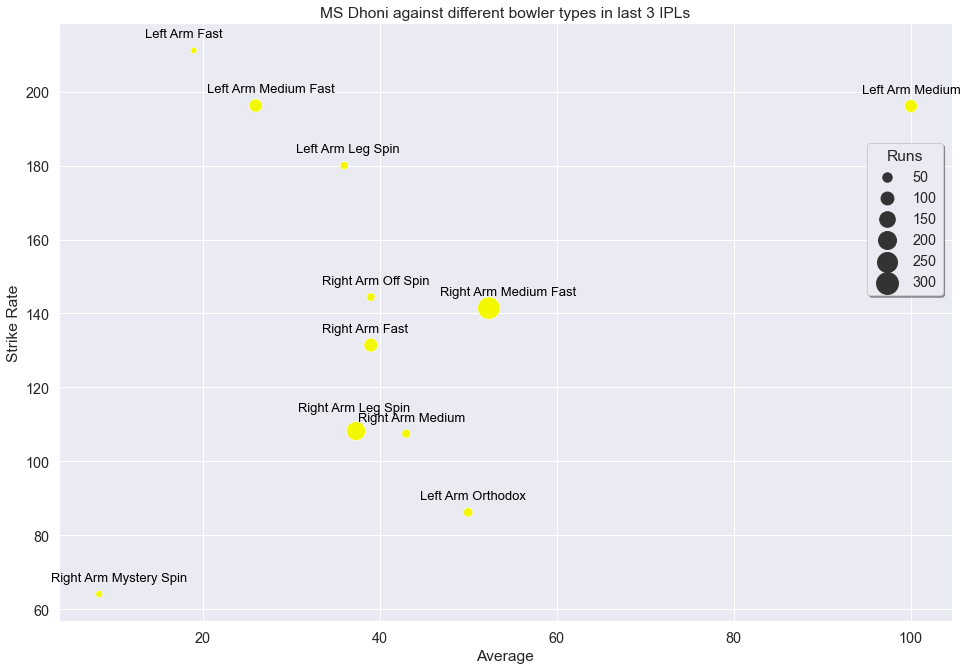

In [217]:
plt.figure(figsize=(16,11))
sns.set(font_scale=1.3)
sns.set_style('darkgrid')
sns.scatterplot(x='Average', y='Strike Rate', data=MS_RP_bowler_type[MS_RP_bowler_type['batsman'] == 'MS Dhoni'], size='batsman_runs', sizes=(40, 500), legend='brief', c=['#f3f700'])
plt.title("MS Dhoni against different bowler types in last 3 IPLs")
plt.xlabel("Average")
plt.ylabel("Strike Rate")
# sns.despine(top=True, left=True, right=True, bottom=True)

for line in range(0,MS_RP_bowler_type[MS_RP_bowler_type['batsman']=='MS Dhoni'].shape[0]):
     if(line==6):
        continue
     plt.text(MS_RP_bowler_type['Average'][line]-5.5, MS_RP_bowler_type['Strike Rate'][line]+3.5, MS_RP_bowler_type['Bowler Category'][line], horizontalalignment='left', size='small', color='black', )

plt.text(MS_RP_bowler_type['Average'][6]-6.5, MS_RP_bowler_type['Strike Rate'][6]+5.5, MS_RP_bowler_type['Bowler Category'][6], horizontalalignment='left', size='small', color='black', )
plt.legend(bbox_to_anchor=(0.99, 0.8), loc=1, borderaxespad=0., title='Runs', shadow=True)


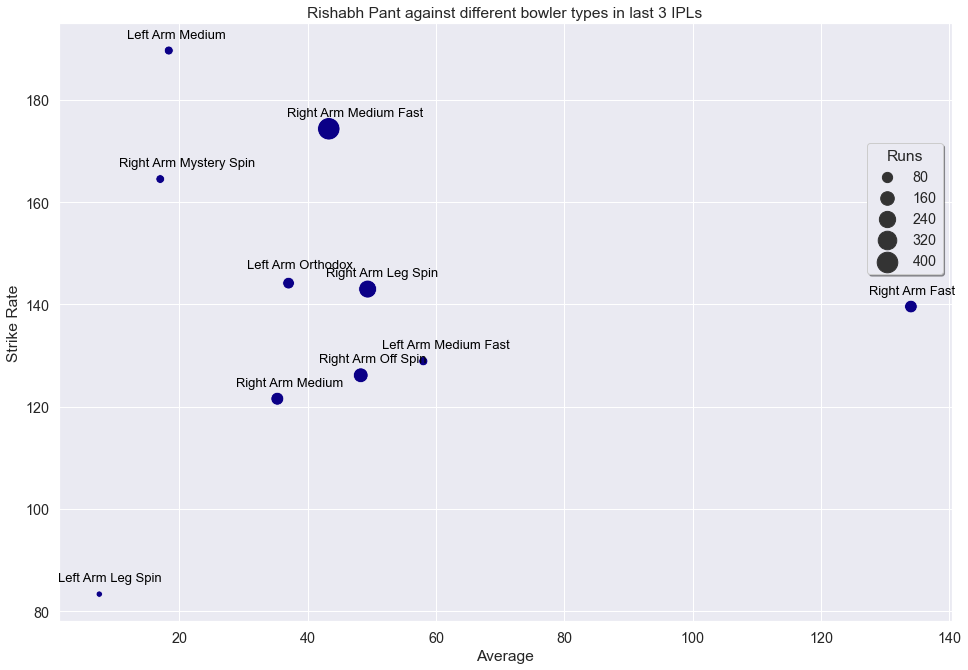

In [220]:
plt.figure(figsize=(16,11))
sns.set(font_scale=1.3)
sns.set_style('darkgrid')
sns.scatterplot(x='Average', y='Strike Rate', data=MS_RP_bowler_type[MS_RP_bowler_type['batsman'] == 'RR Pant'], size='batsman_runs', sizes=(40, 500), legend='brief', c=['#0b0087'])
plt.title("Rishabh Pant against different bowler types in last 3 IPLs")
plt.xlabel("Average")
plt.ylabel("Strike Rate")
# sns.despine(top=True, left=True, right=True, bottom=True)

for line in range(0,MS_RP_bowler_type[MS_RP_bowler_type['batsman']=='RR Pant'].shape[0]):
     if(line==3):
        continue
     plt.text(MS_RP_bowler_type['Average'][line+11]-6.5, MS_RP_bowler_type['Strike Rate'][line+11]+2.5, MS_RP_bowler_type['Bowler Category'][line+11], horizontalalignment='left', size='small', color='#000000', )

plt.text(MS_RP_bowler_type['Average'][14]-6.5, MS_RP_bowler_type['Strike Rate'][14]+3, MS_RP_bowler_type['Bowler Category'][14], horizontalalignment='left', size='small', color='#000000', )

plt.legend(bbox_to_anchor=(0.99, 0.8), loc=1, borderaxespad=0., title='Runs', shadow=True)


In [219]:
MS_RP_bowler_type.loc[18,'ball'] = 275
MS_RP_bowler_type.loc[18,'batsman_runs'] = 476
# MS_RP_bowler_type.loc[17,'is_wicket'] = 3
MS_RP_bowler_type.loc[18,'Average'] = 43.27
MS_RP_bowler_type.loc[18,'Strike Rate'] = 174.35

In [198]:
MS_RP_bowler_type

,batsman,Bowler Category,id,inning,over,ball,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,neutral_venue,result_margin,Average,Strike Rate
0,MS Dhoni,Left Arm Fast,10312959,11,136,9,19,0,19,0,0,0,52.0,19.00,211.11
1,MS Dhoni,Left Arm Leg Spin,22898796,35,246,20,36,1,37,0,0,0,105.0,36.00,180.00
2,MS Dhoni,Left Arm Medium,59376648,65,805,51,100,5,105,0,0,0,470.0,100.00,196.08
3,MS Dhoni,Left Arm Medium Fast,62710187,75,818,53,104,2,106,0,4,0,1437.0,26.00,196.23
4,MS Dhoni,Left Arm Orthodox,67844970,98,635,58,50,4,54,0,0,0,847.0,50.00,86.21
5,MS Dhoni,Right Arm Fast,102580899,127,1357,89,117,4,121,0,3,0,1650.0,39.00,131.46
6,MS Dhoni,Right Arm Leg Spin,242611749,354,2525,207,224,15,239,0,6,0,1992.0,37.33,108.21
7,MS Dhoni,Right Arm Medium,46719727,66,493,40,43,7,50,0,0,0,328.0,43.00,107.50
8,MS Dhoni,Right Arm Medium Fast,259463562,368,3287,222,314,15,329,0,6,0,1897.0,52.33,141.44
9,MS Dhoni,Right Arm Mystery Spin,45449182,73,499,39,25,2,27,0,3,0,245.0,8.33,64.10
